# Conduct analysis on Physical Availability Data
The analysis observe the physical availability (PA) trend across the year and observe the number of occured events during the period

## PA Trending Observation

In [30]:
# import all necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
# load the PA data 
pa_data = pd.read_json('pa_data.json')
pa_data.sort_values(by='Date', inplace=True, ignore_index=True)
pa_data

,Date,Planned Down Time (Hour),Total Operating (Hour),Actual Plan Outage hrs (Hour),Standby hrs (Hour),Force outage by Maintenance (Hour),Force outage by Operation (Hour),Total Down Time Hours (Hour),Operating Hours (Hour),Physical Availability (%),...,Number of internal trip/failure (Times),Number of Down by Maintenance (Times),MTBF (Day),MTTR (Hour),Remarks,Category,LGS Status,Activity or Problem,Related Component,Note
0,2016-12-31,NaN,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
1,2017-01-01,NaN,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
2,2017-01-02,NaN,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
3,2017-01-03,NaN,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
4,2017-01-04,NaN,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2023-12-25,0.48,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,72.0,0,No outages (Normal operation).,None,None,None,None,None
2551,2023-12-26,0.48,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,96.0,0,No outages (Normal operation).,None,None,None,None,None
2552,2023-12-27,0.48,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,120.0,0,No outages (Normal operation).,None,None,None,None,None
2553,2023-12-28,0.48,24,0.0,0.0,0.0,0.0,0.0,24.0,1.0,...,0,0,144.0,0,No outages (Normal operation).,None,None,None,None,None


In [3]:
# Calculate the occurance of abnormal operation
pa_data_abnormal = pa_data[pa_data['Remarks'] != 'No outages (Normal operation).'] 
pa_data_abnormal.sort_values(by='Date', inplace=True, ignore_index=True)
print(pa_data_abnormal[['Date', 'Remarks']])


          Date                                            Remarks
0   2017-01-05  Wahyu Setia Djati:\nLGS#1 down for general PM ...
1   2017-01-12  Wahyu Setia Djati:\nLGS#1 put on standby due t...
2   2017-04-27  Wahyu Setia Djati:\nA1-G1 CB was opened due to...
3   2017-05-05  Wahyu Setia Djati:\nLGS#1 SNL for switching to...
4   2017-05-24  Wahyu Setia Djati:\nLGS#1 shut down for Megger...
..         ...                                                ...
256 2023-09-02  Asep Mulyana:\nLGS#1 put to speed No Load for ...
257 2023-09-06           Asep Mulyana:\nLGS#1 split to FCE grid\n
258 2023-09-14           Asep Mulyana:\nLGS#1 split to Bus A12.\n
259 2023-09-16  Asep Mulyana:\nFurnace BO occurred, A1G1 CB, A...
260 2023-10-04                 Asep Mulyana:\nFCE Grid Blackout\n

[261 rows x 2 columns]


/tmp/ipykernel_15945/2121751856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_data_abnormal.sort_values(by='Date', inplace=True, ignore_index=True)


In [4]:
# calculate the total operational hours and outage hours

pa_data.sum()

# pa_data['Operating Hours (Hour)'].sum()
# pa_data['Number of external trip/failure (Times)'].sum()
# pa_data['Number of internal trip/failure (Times)'].sum()
# pa_data['Actual Plan Outage hrs (Hour)'].sum()
# pa_data['Force outage by Operation (Hour)'].sum()
# pa_data['Force outage by Maintenance (Hour)'].sum()
# pa_data['Total Down Time Hours (Hour)'].sum()

# print(pa_data_abnormal.sum())

/tmp/ipykernel_15945/2534579259.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pa_data.sum()


Planned Down Time (Hour)                                                             17267.8
Total Operating (Hour)                                                                 61320
Actual Plan Outage hrs (Hour)                                                      3696.9766
Standby hrs (Hour)                                                                114.449333
Force outage by Maintenance (Hour)                                                    198.14
Force outage by Operation (Hour)                                                      110.06
Total Down Time Hours (Hour)                                                       4005.1766
Operating Hours (Hour)                                                            57314.8234
Physical Availability  (%)                                                       2388.117642
Utilization of Availability (%)                                                   2403.34358
Number of external trip/failure (Times)                               

## Further Analysis

### Yearly observation

In [32]:
# Tracking the downtime hours across the year
# Dividing data into each years
def year_frame_segmentation(years):
    start_time = []
    end_time = []

    for i in range(len(years)):
        start_str = years[i] + '-01-01'
        end_str = years[i] + '-12-31'

        start_time.append(pd.to_datetime(start_str))
        end_time.append(pd.to_datetime(end_str))

    return start_time, end_time

def data_segmentation_year(data, start_time_list, end_time_list):
    segmented_data = []
    
    # check the start and end list has same length
    if len(start_time_list) != len(end_time_list):
        raise ValueError("Length of start and end time frame list are not equal")

    for i in range(len(start_time_list)):
        segmented = data[(data['Date']>=start_time_list[i]) & (data['Date']<=end_time_list[i])]
        segmented.reset_index(drop=True, inplace=True)

        segmented_data.append(segmented)
    
    return segmented_data

observed_year = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

start, end = year_frame_segmentation(observed_year)

pa_data_segmented = data_segmentation_year(pa_data, start, end)
pa_data_segmented[0]

,Date,Planned Down Time (Hour),Total Operating (Hour),Actual Plan Outage hrs (Hour),Standby hrs (Hour),Force outage by Maintenance (Hour),Force outage by Operation (Hour),Total Down Time Hours (Hour),Operating Hours (Hour),Physical Availability (%),...,Number of internal trip/failure (Times),Number of Down by Maintenance (Times),MTBF (Day),MTTR (Hour),Remarks,Category,LGS Status,Activity or Problem,Related Component,Note
0,2017-01-01,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
1,2017-01-02,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
2,2017-01-03,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
3,2017-01-04,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
4,2017-01-05,NaN,24,0.0,0.0,5.93,0.0,5.93,18.07,0.752917,...,0,0,1.0,0,Wahyu Setia Djati:\nLGS#1 down for general PM ...,Maintenance,LGS,Shutdown,General PM Check; FCE#1 PM Check,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
361,2017-12-28,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
362,2017-12-29,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None
363,2017-12-30,NaN,24,0.0,0.0,0.00,0.0,0.00,24.00,1.000000,...,0,0,1.0,0,No outages (Normal operation).,None,None,None,None,None


In [6]:
# creating dataframe with yearly statistic data
pa_data_resume = []

for i in range(len(pa_data_segmented)):
    yData = [observed_year[i], 
                pa_data_segmented[i]['Actual Plan Outage hrs (Hour)'].sum(), 
                pa_data_segmented[i]['Force outage by Maintenance (Hour)'].sum(), 
                pa_data_segmented[i]['Force outage by Operation (Hour)'].sum(),
                pa_data_segmented[i]['Total Down Time Hours (Hour)'].sum(), 
                pa_data_segmented[i]['Standby hrs (Hour)'].sum(),
                pa_data_segmented[i]['Operating Hours (Hour)'].sum(),
                pa_data_segmented[i]['Total Operating (Hour)'].sum() 
                ]
    
    pa_data_resume.append(yData)

df_data_resume = pd.DataFrame(pa_data_resume, columns=['Year', 'Actual Plant Outage', 'Force Outage by Maintenance', 'Force Outage by Operation', 'Total Down Time','Standby Hour', 'Operating Hour', 'Total Operating'])
# df_data_resume = pd.DataFrame(pa_data_resume, columns=['Year', 'Actual Plant Outage', 'Force Outage by Maintenance', 'Force Outage by Operation'])

df_data_resume

,Year,Actual Plant Outage,Force Outage by Maintenance,Force Outage by Operation,Total Down Time,Standby Hour,Operating Hour,Total Operating
0,2017,66.300000,9.946667,7.96,84.206667,4.003333,8675.793333,8760
1,2018,178.753333,41.313333,0.31,220.376667,6.110000,8539.623333,8760
2,2019,1723.986667,0.000000,14.27,1738.256667,11.240000,7021.743333,8760
3,2020,151.340000,3.300000,20.69,175.330000,12.910000,8608.670000,8784
4,2021,1244.860000,85.530000,49.31,1379.700000,42.856000,7380.300000,8760
5,2022,322.306600,50.070000,12.93,385.306600,32.710000,8374.693400,8760
6,2023,9.430000,7.980000,4.59,22.000000,4.620000,8690.000000,8712


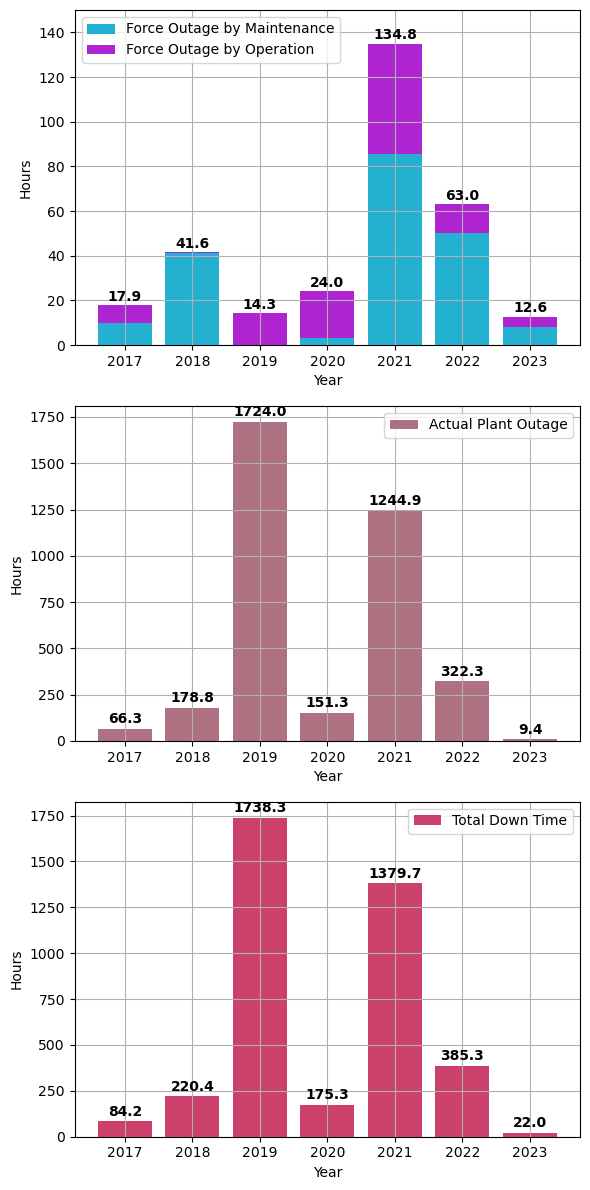

In [7]:
# create the plot
fig = plt.figure(figsize=(6, 12))

# first axis
ax = fig.add_subplot(311)

barData = df_data_resume[['Force Outage by Maintenance', 'Force Outage by Operation']]
totals = barData.sum(axis=1)
colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(barData))

x = df_data_resume['Year']

for i, col in enumerate(barData.columns):
    ax.bar(x, barData[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(barData[col])

y_offset = 2
for i, total in enumerate(totals):
    ax.text(totals.index[i], total+y_offset, round(total,1), ha='center', weight='bold')


ax.set_ylim([0, 150])

#ax.bar(x, y1, label='Force Outage by Maintenance')
#ax.bar(x, y2, bottom=y1, label='Force Outage by Operation')

ax.set_xlabel("Year")
ax.set_ylabel("Hours")

ax.legend()
ax.grid()

# second axis
ax2 = fig.add_subplot(312)
barData = df_data_resume['Actual Plant Outage']
totals = barData
colors = ['#ae7181']
bottom = np.zeros(len(barData))

x = df_data_resume['Year']

ax2.bar(x, barData, label='Actual Plant Outage', color=colors[0])

y_offset = 30
for i, total in enumerate(totals):
    ax2.text(totals.index[i], total+y_offset, round(total,1), ha='center', weight='bold')
ax2.set_xlabel("Year")
ax2.set_ylabel("Hours")

ax2.legend()
ax2.grid()

# third axis
ax3 = fig.add_subplot(313)

barData = df_data_resume['Total Down Time']
totals = barData
colors = ['#cb416b']
bottom = np.zeros(len(barData))

x = df_data_resume['Year']

ax3.bar(x, barData, label='Total Down Time', color=colors[0])

y_offset = 30
for i, total in enumerate(totals):
    ax3.text(totals.index[i], total+y_offset, round(total,1), ha='center', weight='bold')
ax3.set_xlabel("Year")
ax3.set_ylabel("Hours")

ax3.legend()
ax3.grid()

fig.tight_layout()

### Monthly observation

In [33]:
# dividing data on each month
def month_frame_segmentation(data):
    year = data['Date'][0].year
    idx_month = np.arange(1, 13)
    segmented_data = []
    for i in range(len(idx_month)):
        frame = str(year) + '-' + f"{i+1:02}"
        segmented = pa_data[pa_data['Date'].dt.strftime('%Y-%m') == frame]
        segmented.reset_index(drop=True, inplace=True)

        segmented_data.append(segmented)

    return segmented_data

# analyze data on 2021 (idx = 4)
pa_data_segmented_month = month_frame_segmentation(pa_data_segmented[4])
pa_data_segmented_month[11]

#a = start[0].to_pydatetime()
#a.strftime("%B")

,Date,Planned Down Time (Hour),Total Operating (Hour),Actual Plan Outage hrs (Hour),Standby hrs (Hour),Force outage by Maintenance (Hour),Force outage by Operation (Hour),Total Down Time Hours (Hour),Operating Hours (Hour),Physical Availability (%),...,Number of internal trip/failure (Times),Number of Down by Maintenance (Times),MTBF (Day),MTTR (Hour),Remarks,Category,LGS Status,Activity or Problem,Related Component,Note
0,2021-12-01,24.0,24,0.0,0.38,0.0,0.00,0.00,24.00,1.000000,...,0,0,120.00,0,Asep Mulyana:\nLGS#2 was shut off to SNL for s...,Standby,Speed No Load,Prepare Split to Grid,FCE Grid,None
1,2021-12-02,24.0,24,0.0,0.00,0.0,3.07,3.07,20.93,0.872083,...,0,0,140.93,0,Asep Mulyana:\nTripped by TBO\nLGS#1 A1G1 Trip...,Operation,Trip,Total Black Out,A1G1,None
2,2021-12-03,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,164.93,0,No outages (Normal operation).,None,None,None,None,None
3,2021-12-04,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,24.00,0,No outages (Normal operation).,None,None,None,None,None
4,2021-12-05,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,48.00,0,No outages (Normal operation).,None,None,None,None,None
5,2021-12-06,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,72.00,0,No outages (Normal operation).,None,None,None,None,None
6,2021-12-07,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,96.00,0,No outages (Normal operation).,None,None,None,None,None
7,2021-12-08,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,120.00,0,No outages (Normal operation).,None,None,None,None,None
8,2021-12-09,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,144.00,0,No outages (Normal operation).,None,None,None,None,None
9,2021-12-10,24.0,24,0.0,0.00,0.0,0.00,0.00,24.00,1.000000,...,0,0,168.00,0,No outages (Normal operation).,None,None,None,None,None


In [9]:
# creating dataframe with monthly statistic data
observed_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des']
pa_data_resume_month = []

for i in range(len(pa_data_segmented_month)):
    yData = [observed_month[i], 
                pa_data_segmented_month[i]['Actual Plan Outage hrs (Hour)'].sum(), 
                pa_data_segmented_month[i]['Force outage by Maintenance (Hour)'].sum(), 
                pa_data_segmented_month[i]['Force outage by Operation (Hour)'].sum(),
                pa_data_segmented_month[i]['Total Down Time Hours (Hour)'].sum(), 
                pa_data_segmented_month[i]['Standby hrs (Hour)'].sum(),
                pa_data_segmented_month[i]['Operating Hours (Hour)'].sum(),
                pa_data_segmented_month[i]['Total Operating (Hour)'].sum() 
                ]
    
    pa_data_resume_month.append(yData)

df_data_resume_month = pd.DataFrame(pa_data_resume_month, columns=['Month', 'Actual Plant Outage', 'Force Outage by Maintenance', 'Force Outage by Operation', 'Total Down Time','Standby Hour', 'Operating Hour', 'Total Operating'])
# df_data_resume = pd.DataFrame(pa_data_resume, columns=['Year', 'Actual Plant Outage', 'Force Outage by Maintenance', 'Force Outage by Operation'])

df_data_resume_month

,Month,Actual Plant Outage,Force Outage by Maintenance,Force Outage by Operation,Total Down Time,Standby Hour,Operating Hour,Total Operating
0,Jan,14.79,0.00,1.03,15.82,0.300,728.18,744
1,Feb,552.00,38.65,0.00,590.65,0.000,81.35,672
2,Mar,527.65,0.00,0.00,527.65,0.000,216.35,744
3,Apr,5.80,0.00,0.00,5.80,0.000,714.20,720
4,May,0.00,6.37,42.70,49.07,2.250,694.93,744
5,Jun,72.00,2.82,0.35,75.17,18.806,644.83,720
6,Jul,0.00,0.00,0.00,0.00,0.000,744.00,744
7,Aug,0.00,1.63,0.00,1.63,0.000,742.37,744
8,Sep,0.00,21.33,0.00,21.33,19.960,698.67,720
9,Oct,72.62,14.73,0.00,87.35,0.000,656.65,744


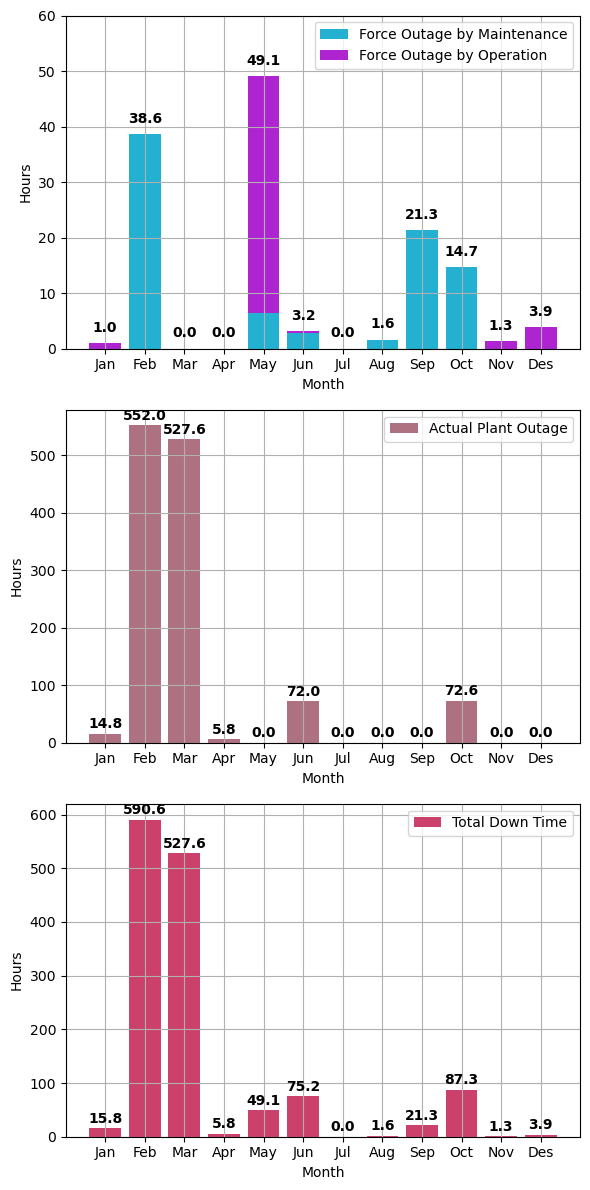

In [10]:
# create the plot
fig = plt.figure(figsize=(6, 12))

# first axis
ax = fig.add_subplot(311)

barData = df_data_resume_month[['Force Outage by Maintenance', 'Force Outage by Operation']]
totals = barData.sum(axis=1)
colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(barData))

x = df_data_resume_month['Month']

for i, col in enumerate(barData.columns):
    ax.bar(x, barData[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(barData[col])

y_offset = 2
for i, total in enumerate(totals):
    ax.text(totals.index[i], total+y_offset, round(total,1), ha='center', weight='bold')


ax.set_ylim([0, 60])

#ax.bar(x, y1, label='Force Outage by Maintenance')
#ax.bar(x, y2, bottom=y1, label='Force Outage by Operation')

ax.set_xlabel("Month")
ax.set_ylabel("Hours")

ax.legend()
ax.grid()

# second axis
ax2 = fig.add_subplot(312)
barData = df_data_resume_month['Actual Plant Outage']
totals = barData
colors = ['#ae7181']
bottom = np.zeros(len(barData))

ax2.bar(x, barData, label='Actual Plant Outage', color=colors[0])

y_offset = 10
for i, total in enumerate(totals):
    ax2.text(totals.index[i], total+y_offset, round(total,1), ha='center', weight='bold')
ax2.set_xlabel("Month")
ax2.set_ylabel("Hours")

ax2.legend()
ax2.grid()

# third axis
ax3 = fig.add_subplot(313)

barData = df_data_resume_month['Total Down Time']
totals = barData
colors = ['#cb416b']
bottom = np.zeros(len(barData))

ax3.bar(x, barData, label='Total Down Time', color=colors[0])

y_offset = 10
for i, total in enumerate(totals):
    ax3.text(totals.index[i], total+y_offset, round(total,1), ha='center', weight='bold')
ax3.set_xlabel("Month")
ax3.set_ylabel("Hours")

ax3.legend()
ax3.grid()

fig.tight_layout()

### Cause observation (monthly)

In [34]:
# yearly dataframe
yData = pa_data_segmented

# monthly dataframe
mData = pa_data_segmented_month

In [35]:
# Filter data into abnormal operation dataframe
def extract_abnormal(data):
    abnormal_data = []
    
    for i in range(len(data)):
        pa_data = data[i]
        abnormal = pa_data[pa_data['Remarks'] != 'No outages (Normal operation).']
        abnormal.sort_values(by='Date', inplace=True, ignore_index=True)

        abnormal_data.append(abnormal)

    return abnormal_data

yData_abnormal = extract_abnormal(yData)
mData_abnormal = extract_abnormal(mData)

yData_abnormal[4]

/tmp/ipykernel_15945/134203142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal.sort_values(by='Date', inplace=True, ignore_index=True)


,Date,Planned Down Time (Hour),Total Operating (Hour),Actual Plan Outage hrs (Hour),Standby hrs (Hour),Force outage by Maintenance (Hour),Force outage by Operation (Hour),Total Down Time Hours (Hour),Operating Hours (Hour),Physical Availability (%),...,Number of internal trip/failure (Times),Number of Down by Maintenance (Times),MTBF (Day),MTTR (Hour),Remarks,Category,LGS Status,Activity or Problem,Related Component,Note
0,2021-01-04,24.0,24,0.00,0.30,0.0,0.00,0.00,24.00,1.000000,...,0,0,72.00,0,Asep Mulyana:\nA1G1 CB was opened\n- LGS#1 put...,Standby,Put on Standby,Prepare Split to Grid,FCE Grid; Auxiliary Grid,Prepare Split to FCE Grid; Prepare Split to Au...
1,2021-01-12,24.0,24,0.00,0.00,0.0,0.22,0.22,23.78,0.990833,...,0,0,95.78,0,Asep Mulyana:\n Hydro to FCE grid black out\n-...,Operation,Hydro to Grid Blackout,Grid Blackout,FCE Grid,None
2,2021-01-18,0.0,24,7.37,0.00,0.0,0.00,7.37,16.63,0.692917,...,0,0,64.63,0,Asep Mulyana:\nLGS#1 shutdown for generator pr...,Actual Plant Outage,Shutdown,Protection Check; Component Replace; HIRA,Generator; CW-101; Turbine,None
3,2021-01-19,0.0,24,7.42,0.00,0.0,0.00,7.42,16.58,0.690833,...,0,0,81.21,0,Asep Mulyana:\nLGS#1 shut down for PM Check & ...,Actual Plant Outage,Shutdown,PM Check; HIRA,LGS; Ion,None
4,2021-01-25,24.0,24,0.00,0.00,0.0,0.81,0.81,23.19,0.966250,...,0,0,71.19,0,Asep Mulyana:\nLGS#1 Trip by request from PLC ...,Operation,Trip,Request from PLC Alarm,Penstock Gate,Penstock Gate Close Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2021-11-29,24.0,24,0.00,0.63,0.0,0.00,0.00,24.00,1.000000,...,0,0,72.00,0,Asep Mulyana:\nLGS#1 was shut off to SNL for P...,Standby,Speed No Load,PMC Disc Switch,Bus#A-21,None
81,2021-11-30,24.0,24,0.00,0.23,0.0,0.00,0.00,24.00,1.000000,...,0,0,96.00,0,Asep Mulyana:\nLGS#2 was shut off to SNL for s...,Standby,Speed No Load,Prepare Split to Grid,FCE Grid,None
82,2021-12-01,24.0,24,0.00,0.38,0.0,0.00,0.00,24.00,1.000000,...,0,0,120.00,0,Asep Mulyana:\nLGS#2 was shut off to SNL for s...,Standby,Speed No Load,Prepare Split to Grid,FCE Grid,None
83,2021-12-02,24.0,24,0.00,0.00,0.0,3.07,3.07,20.93,0.872083,...,0,0,140.93,0,Asep Mulyana:\nTripped by TBO\nLGS#1 A1G1 Trip...,Operation,Trip,Total Black Out,A1G1,None


In [36]:
np.unique(yData_abnormal[4]['Category'].to_numpy()).shape

(5,)

In [37]:
np.unique(yData_abnormal[4]['LGS Status'].to_numpy()).shape

(12,)

In [38]:
np.unique(yData_abnormal[4]['Activity or Problem'].to_numpy()).shape

(17,)

In [39]:
np.unique(yData_abnormal[4]['Related Component'].to_numpy()).shape

(22,)